In [1]:
%load_ext autoreload
%autoreload 2

# Testcount preprocessing
National/regional holidays can negatively impact the number of performed tests. Also the latest testcount data may be unavailable.

With `covid.data_preprocessing.predict_testcounts`, these testcounts can be predicted using [PM-Phrophet](https://github.com/luke14free/pm-prophet).

The predictions can interpolate/extrapolate `NaN` values and optionally override/keep the observed testcounts.

In [10]:
from matplotlib import pyplot
import numpy
import os
import pandas
import pathlib
import sys

fp_module = pathlib.Path('..').resolve()
sys.path.append(str(fp_module))

import covid.data
import covid.data_preprocessing

## Get input data
The `total` column of the standard `date`-indexed dataframe is used.

In [11]:
df_region = covid.data.get_and_process_covidtracking_data(pandas.Timestamp("2020-07-05")).xs("NY")
df_region.tail()

,positive,total
date,,
2020-06-30,524.0,52025.0
2020-07-01,625.0,56710.0
2020-07-02,875.0,69945.0
2020-07-03,918.0,66392.0
2020-07-04,726.0,62403.0


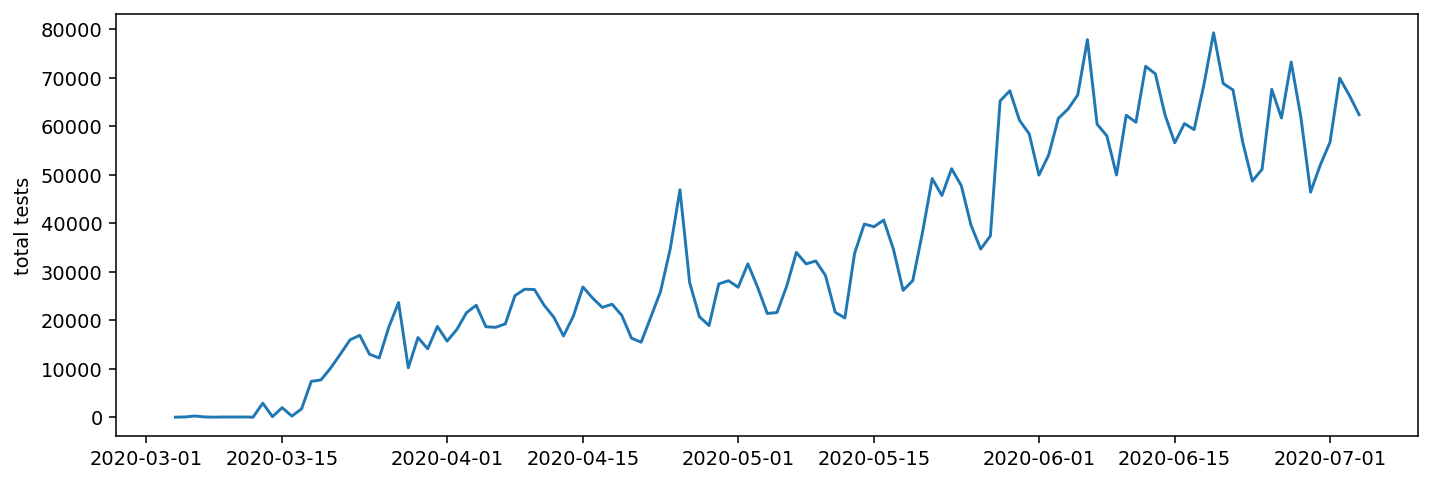

In [12]:
fig, ax = pyplot.subplots(dpi=140, figsize=(12, 4))
ax.plot(df_region.index, df_region.total)
ax.set_ylabel("total tests")
pyplot.show()

## Make the prediction
The prediction is made from the `date`-indexed `total` testcounts.
`country` and `region` must be specified so the function can take national/regional holidays into account.

With `keep_data` one can switch between:
+ `True`: original `total` testcounts are kept
+ `False`: the observations are also predicted (resulting in a smoothed profile)

Optional kwargs are available to adapt to non-reqular patterns in the data:
+ `ignore_before` is used to ignore the ramp-up in test capacity ath the beginning
+ `growth` may be used to switch between a "linear" or "logistic" growth model.

In [54]:
result, m, forecast, holidays = covid.data_preprocessing.predict_testcounts(
    df_region.total,  
    country="US", region="NY",
    keep_data=False,
    # optional arguments:
    ignore_before=pandas.Timestamp("2020-04-15"),
)

           ds        y  floor      cap
0  2020-04-15  26869.0      0  79303.0
1  2020-04-16  24567.0      0  79303.0
2  2020-04-17  22644.0      0  79303.0
3  2020-04-18  23309.0      0  79303.0
4  2020-04-19  21023.0      0  79303.0
..        ...      ...    ...      ...
76 2020-06-30  52025.0      0  79303.0
77 2020-07-01  56710.0      0  79303.0
78 2020-07-02  69945.0      0  79303.0
79 2020-07-03  66392.0      0  79303.0
80 2020-07-04  62403.0      0  79303.0

[81 rows x 4 columns]
---


/home/fredrik/anaconda3/lib/python3.8/site-packages/pmprophet/model.py:165: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  (dates - pd.datetime(1970, 1, 1)).dt.total_seconds().astype(np.float)


TypeError: cannot perform __rmul__ with this index type: DatetimeArray

In [31]:
fig, ax = pyplot.subplots(figsize=(16, 4))
ax.plot(df_region.index, df_region.total, label="observed")
ax.plot(df_region.index, result.values, label="predicted")
ymin, ymax = ax.get_ylim()
for date, label in holidays.items():
    if date in list(result.index):
        ax.axvline(date, linestyle=":", color="grey")
        ax.text(
            date,
            ymin * 0.03,
            s=f"{label}\n",
            color="gray",
            rotation=90,
            verticalalignment="bottom",
            horizontalalignment="center",
        )
ax.set_ylabel("total tests")
ax.legend()
pyplot.show()

The `predict_testcounts` function returned the Prophet model and full fitting result (`forecast`). This can be used for a more detailed analysis of the fit:

fig, ax = pyplot.subplots(figsize=(13.4, 4))
m.plot(forecast, ax=ax);

SyntaxError: invalid syntax (<ipython-input-31-d3d9715ef5ec>, line 21)

In [9]:
m.plot_components(forecast, figsize=(13.4, 8));

NameError: name 'm' is not defined